In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import random
import math
import tensorflow as tf
import matplotlib as mpl
import IPython.display as display

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing import image
import PIL.Image
from scipy.ndimage.filters import gaussian_filter

In [2]:
import pathlib
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data_dir ="/content/gdrive/MyDrive/ML/animal"
data_dir = pathlib.Path(data_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

203


**[Cats](https://drive.google.com/drive/folders/1BRl_gCbKbQW7bx4C4u1Njny4e1jeNfSf?usp=sharing)**

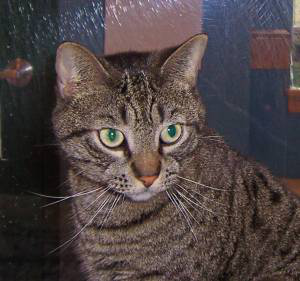

In [5]:
cat = list(data_dir.glob('cat/*'))
PIL.Image.open(str(cat[1]))

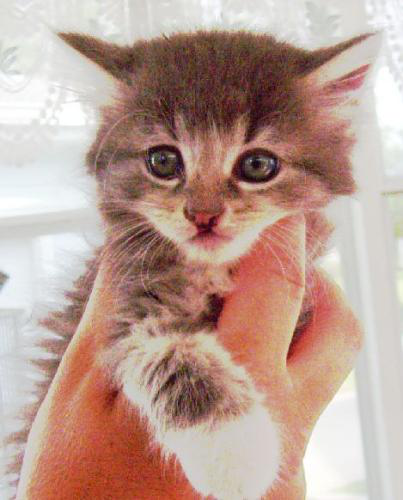

In [6]:
PIL.Image.open(str(cat[2]))

[**Dogs**](https://drive.google.com/drive/folders/1tQv_rJSSyJvM7TVb55mz0slu13nvUtAE?usp=sharing)

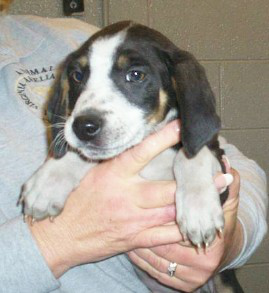

In [7]:
dog = list(data_dir.glob('dog/*'))
PIL.Image.open(str(dog[1]))

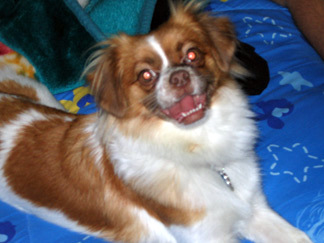

In [8]:
PIL.Image.open(str(dog[30]))

**[Lion](https://drive.google.com/drive/folders/1yVDJ8yIP8Cj-dTUxdV7foCfd9N21u37e?usp=sharing)**

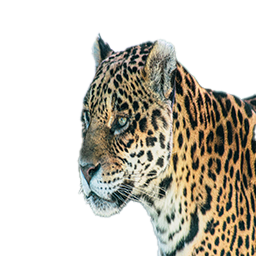

In [9]:
Lion = list(data_dir.glob('Lion/*'))
PIL.Image.open(str(Lion[1]))

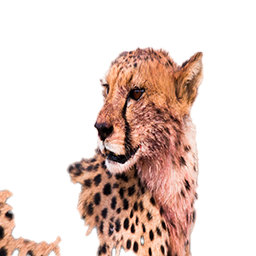

In [10]:
PIL.Image.open(str(Lion[20]))

**[Tiger](https://drive.google.com/drive/folders/1sfq1YCGk4ZJhRqJGRbvck5ZKkMGiUChv?usp=sharing)**

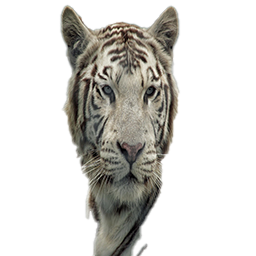

In [11]:
tiger = list(data_dir.glob('tiger/*'))
PIL.Image.open(str(tiger[1]))

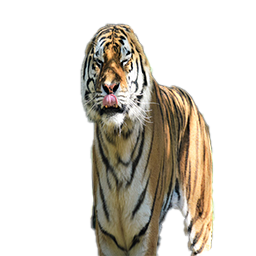

In [12]:
PIL.Image.open(str(tiger[20]))

In [13]:
batch_size = 32
img_height = 180
img_width = 180

In [14]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 563 files belonging to 4 classes.
Using 451 files for training.


In [15]:
class_names = train_ds.class_names
print(class_names)


['Lion', 'cat', 'dog', 'tiger']


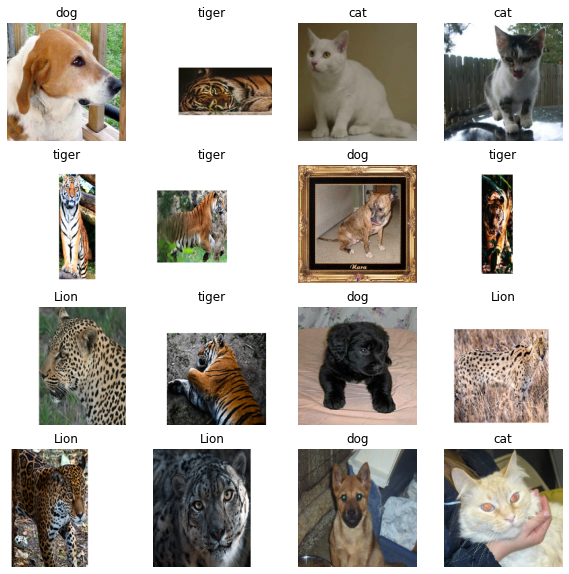

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")